# Explarotary Analysis for Store Data

- Handling for missing entries
- Data types and formats that should be chaged
- Univariate analysis of the feature
- Bivariate anlaysis of the feature

# Import Packages 

In [21]:
import imp
import os,sys
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#import custome modules
sys.path.append('../')
from scripts import data_loader

from scripts.get_missing_information import MissingInformation



# Extract Store Data

In [22]:
store_df = data_loader.load_data('../data/raw/store.csv')
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [23]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


contains 9 column with 1115 rows. There are also missing valuess in 
- CompetitionOpenSinceMonth
- CompetitionOpenSinceYear
- Promo2SinceWeek
- Promo2SinceYear
- PromoInterval

There 3 categorical, 2 int64, and 4 float 64 attributes 

In [24]:
minfo = MissingInformation(store_df)

mis_val_table_ren_columns = minfo.missing_values_table(store_df)
mis_val_table_ren_columns


,Missing Values,% of Total Values,Dtype
Promo2SinceWeek,544,48.8,float64
Promo2SinceYear,544,48.8,float64
PromoInterval,544,48.8,object
CompetitionOpenSinceMonth,354,31.7,float64
CompetitionOpenSinceYear,354,31.7,float64
CompetitionDistance,3,0.3,float64


We may have the distance to the nearest competition but the CompetitionOpenSinceMonth, and CompetitionOpenSinceYear may be null.

<AxesSubplot:>

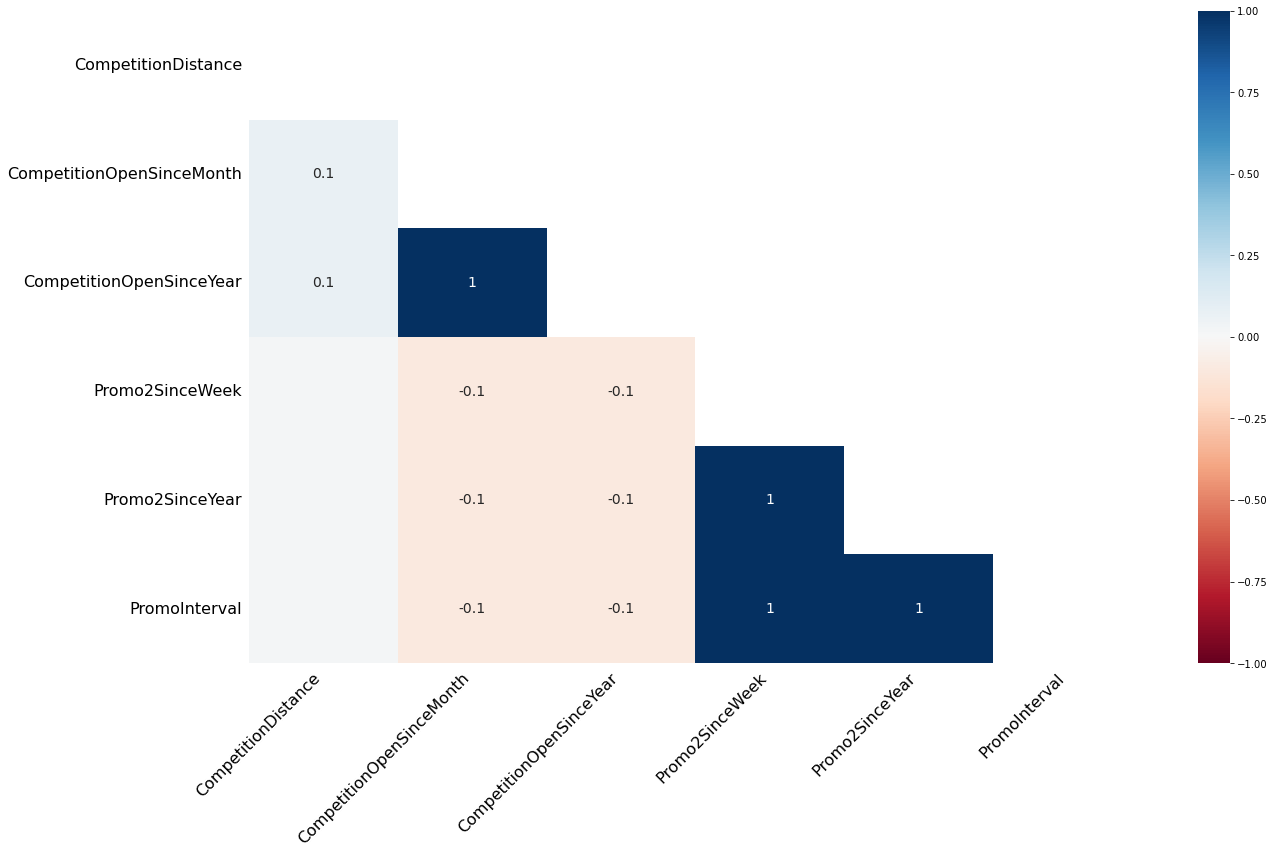

In [42]:
msno.heatmap(store_df)


Missing values are realated. If there a miss in CompetitionOpenSinceYear there it will be also in CompetitionOpenSinceMonth. And it is the same for Promo2SinceWeek and Promo2SinceYear.

# Categorical Count

<AxesSubplot:>

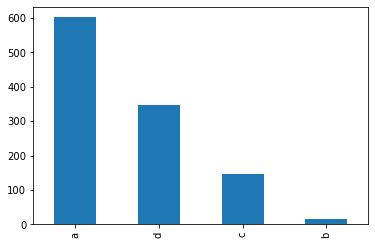

In [26]:
store_df['StoreType'].value_counts().plot(kind='bar')

In [36]:
import pandas as pd
def get_percentage_counts(df:pd.DataFrame,column:str):
    count_dict = df[column].value_counts()
    
    return pd.DataFrame(count_dict)

,StoreType
a,602
d,348
c,148
b,17


In [38]:
get_percentage_counts(store_df, 'StoreType')


,StoreType
a,602
d,348
c,148
b,17


<AxesSubplot:>

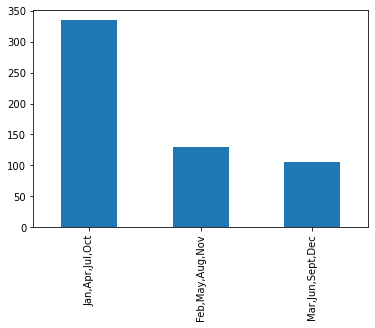

In [27]:
store_df['PromoInterval'].value_counts().plot(kind='bar')


In [39]:
get_percentage_counts(store_df, 'PromoInterval')


,PromoInterval
"Jan,Apr,Jul,Oct",335
"Feb,May,Aug,Nov",130
"Mar,Jun,Sept,Dec",106


<AxesSubplot:>

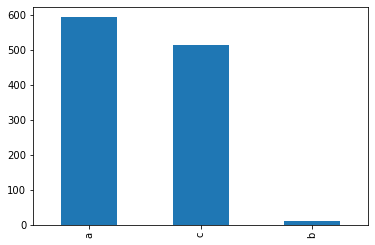

In [28]:
store_df['Assortment'].value_counts().plot(kind='bar')


In [40]:
get_percentage_counts(store_df, 'Assortment')


,Assortment
a,593
c,513
b,9


- where competition is null
- Where CompetitionDistance is not null but CompetitionOpenSinceYear is null
Univariate Analysis
- Categorical columns unique count
bivariate 
- sns boxplort
- catplot